# Regresión Lineal

## Elaborado por: Martín Ordóñez

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [2]:
filename = '/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Track Machine Learning I/Introducción to Machine Learning/Regresion_lineal/modifiedBostonHousing.csv'
df = pd.read_csv(filename)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Obtengo la data que me va a servir 

df = df.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


### Análisis exploratorio de datos

 La razón por la cual se hace esto antes de proceder con el aprendizaje automático, es que un error gravísimo y muy común es simplemente asumir que tus datos están listos para usarlos en el trabajo, y que no pondrán ninguna sorpresa sobre la mesa más adelante.

In [4]:
# Mira la forma del marco de datos
df.shape

(506, 4)

In [5]:
# Faltan valores en la columna y, que es lo que predeciremos.
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [6]:
# Elimine filas enteras del marco de datos si contienen nans o 'todos'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [7]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

# Correlación 

Un beneficio del modelado es la capacidad de razonar sobre cientos de características a la vez. No hay límite para la cantidad de funciones que se pueden usar. Sin embargo, a menudo, un pequeño conjunto de características explica la mayor parte de la varianza (suponiendo que existe una relación lineal). Una forma relativamente buena de elegir características es trazar una matriz de correlación (aunque con muchas variables, la matriz puede resultar ser un poco abrumadora).

In [8]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [9]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


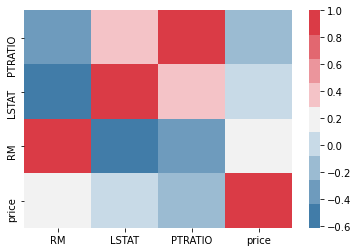

In [10]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

# Histogramas

 Los histogramas se utilizan a menudo para ver si hay algo interesante en los datos. En este caso, se usa para ver si hay algo extraño en el histograma de precios.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb19940>,
      dtype=object)

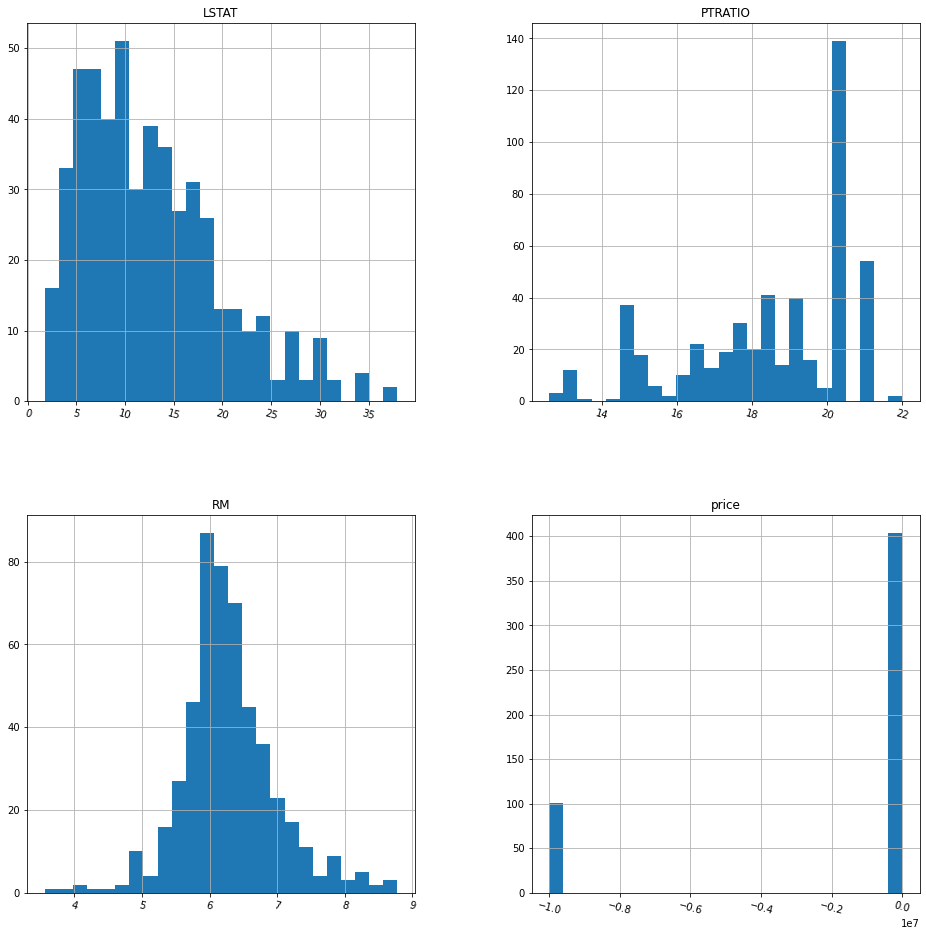

In [12]:
df.loc[:,:].hist(bins=25, figsize = (16,16),
xlabelsize = '10',
ylabelsize = '10', xrot = -15)

Parece haber muchos precios negativos, lo que tiene muy poco sentido. Para este conjunto de datos, supongamos que estos precios negativos eran solo algunas casas que no tenían un precio de venta válido, y deben eliminarse del conjunto de datos. 

In [13]:
priceFilter = df.loc[:, 'price'] < 0
df = df.loc[~priceFilter, :]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fcfbf70>,
      dtype=object)

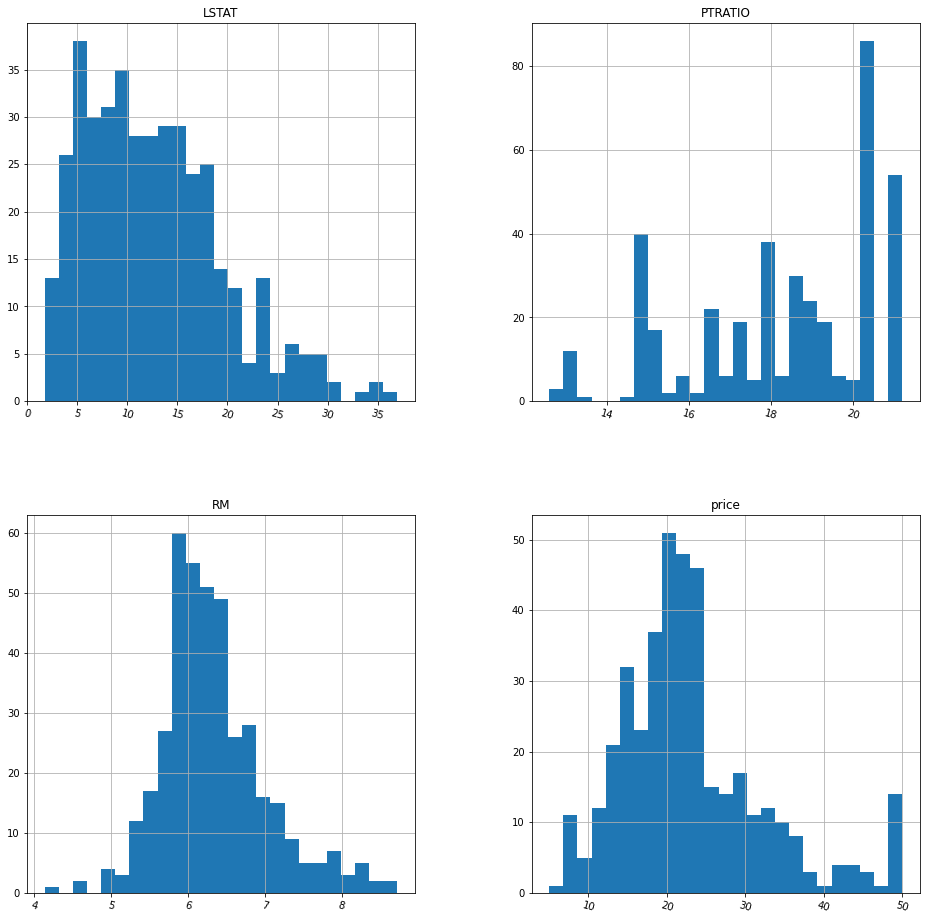

In [14]:
df.loc[:,:].hist(bins=25, figsize = (16,16),
xlabelsize = '10',
ylabelsize = '10', xrot = -15)

In [15]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.650967,-0.349077,0.798988
LSTAT,-0.650967,1.000000,0.384370,-0.752900
PTRATIO,-0.349077,0.384370,1.000000,-0.551638
price,0.798988,-0.752900,-0.551638,1.000000


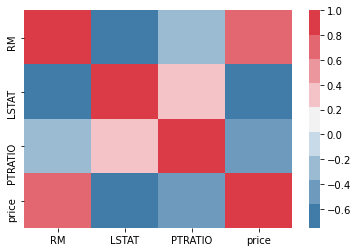

In [17]:
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, n=9))

Examinaremos las características, “RM”, “LSTAT” y “PTRATIO”, que nos brindan información cuantitativa sobre cada punto de datos. La variable objetivo, “precio”, será la variable que buscamos predecir.

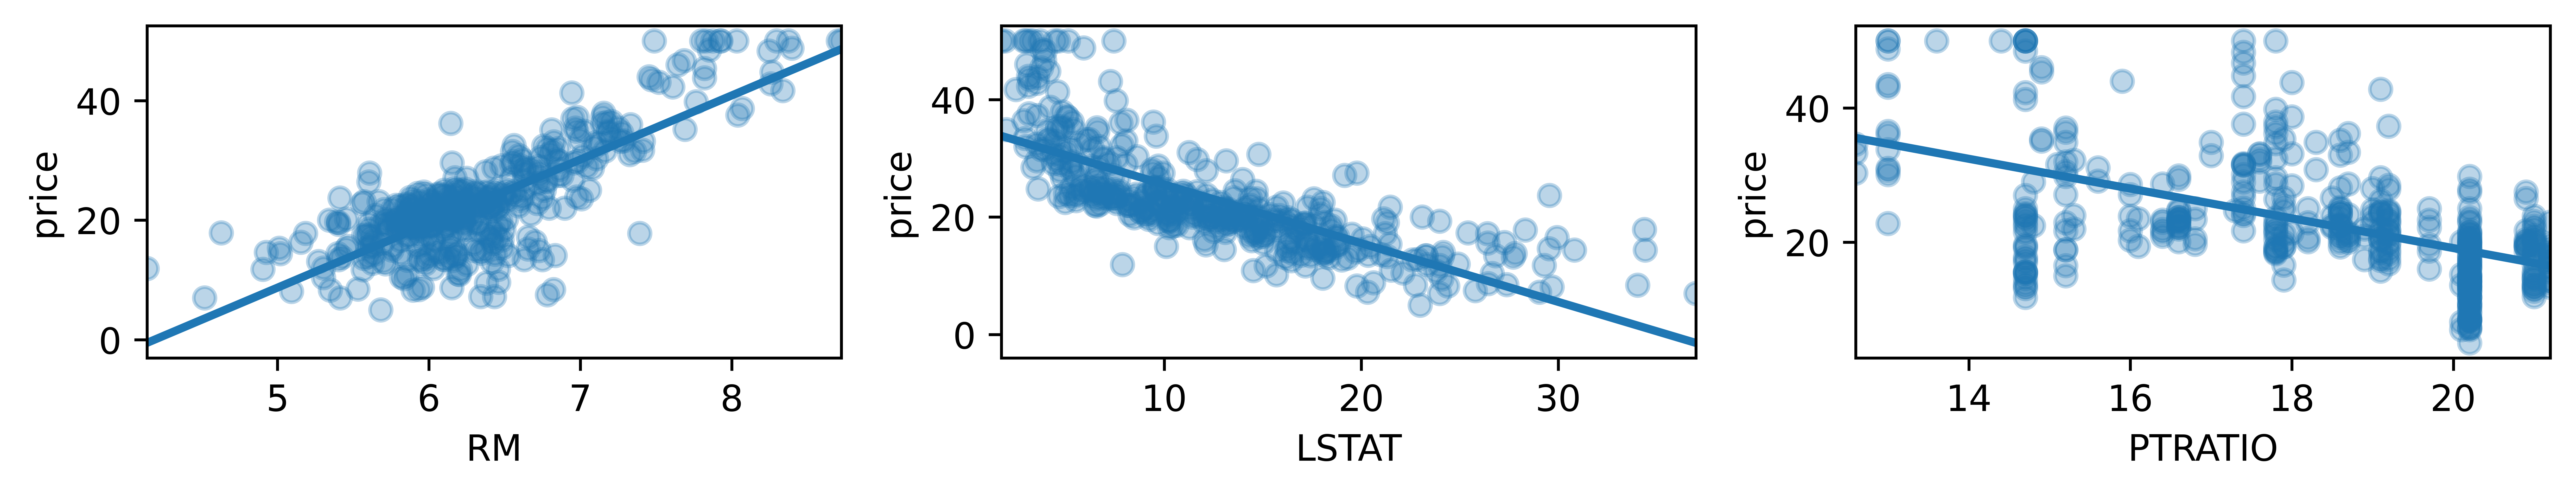

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

# Organización de datos en la matriz de características y el vector de destino

In [22]:
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [24]:
X.shape

(404, 3)

In [25]:
Y = df.loc[:, 'price']

In [27]:
Y.shape

(404,)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
reg = LinearRegression(fit_intercept=True)

In [31]:
reg.fit(X,Y)

LinearRegression()

In [32]:
# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
reg.predict(X[0].reshape(-1,3))

array([30.93692265])

In [33]:
reg.predict(X)

array([30.93692265, 25.54732909, 32.87840913, 31.22126902, 31.14158522,
       26.45245446, 23.99307176, 22.0562208 , 13.67300117, 21.85868698])

# Midiendo el desempeño del modelo

A diferencia de la clasificación de modelos, donde una métrica común significa precisión, los modelos de regresión utilizan otras métricas, tales como R^2, el coeficiente de determinación para cuantificar el desempeño de tu modelo. El mejor puntaje posible es 1.0. Un modelo constante que siempre predice el valor esperado de y, ignorando las funciones de input, haría que R^2 obtenga un puntaje de 0.0.

In [35]:
score = reg.score(X, Y)
print(score)

0.7848414273030438


In [36]:
reg.coef_

array([ 6.61452725, -0.44571061, -1.00672009])

In [37]:
reg.intercept_

5.068862183051451

In [38]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )

formula: y = 6.61*RM + -0.45*LSTAT + -1.01*'PTRATIO + 5.07


In [39]:
import statsmodels.formula.api as smf

In [48]:
#modelo de regresion simple
#con ols hay que ponerle fit para que se ajuste
lm = smf.ols(formula="Y~X", data = df).fit()
# el fit sirve para crear la recta que mejor se ajuste utilziando
# la tecnica de minimizar la suma de los errores al cuadrado

In [51]:
lm.pvalues

Intercept    1.644154e-01
X[0]         8.643814e-45
X[1]         1.012556e-23
X[2]         1.026877e-20
dtype: float64

In [53]:
lm.rsquared

0.784841427303044

In [54]:
lm.mse_total

83.4730513107142

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     486.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.05e-133
Time:                        19:11:32   Log-Likelihood:                -1156.2
No. Observations:                 404   AIC:                             2320.
Df Residuals:                     400   BIC:                             2336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      3.639      1.393      0.1

In [56]:
import sklearn.metrics as metrics

In [59]:
Y_hat = reg.predict(X)

In [61]:
mae = metrics.mean_absolute_error(Y, Y_hat)
mse = metrics.mean_squared_error(Y, Y_hat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(Y,Y_hat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3.2313558816689714
MSE: 17.915487275260496
RMSE: 4.232669048633556
R-Squared: 0.7848414273030438
